### Introduction to Sklearn
0) An end to end scikit learn workflow
1) Getting the data ready
2) Choosing the right estimator/algorithm for our problems
3) Fit the model/algorithm and use it to make predictions on our data
4) Evaluating a model
5) Improve a model
6) Save & load a trained model
7) Putting it all together

## 0) An end to end scikit learn workflow

## 1) Getting the data ready

In [1]:

import pandas as pd
import numpy as np
heart_disease = pd.read_csv('data/heart-disease.csv')


In [2]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#create a X (features metrix)
X = heart_disease.drop('target',axis=1)
#create a Y (labels)
Y = heart_disease['target']

In [4]:
X


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## 2) Choose the right estimator/algorithm for our problems

In [38]:
# Choose the right model & hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
#We will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3) Fit the model to the training data
- 80% of the data is for training & 
20% is for testing

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
len(X_train)


242

In [17]:
len(X_test)

61

In [18]:
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [19]:
Y_preds=clf.predict(X_test)

In [20]:
Y_preds

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1])

## 4) Evaluate the model

In [23]:
clf.score(X_train,Y_train)


1.0

In [24]:
clf.score(X_test,Y_test)

0.8688524590163934

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.86      0.91      0.89        35

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



In [26]:
print(confusion_matrix(Y_test,Y_preds))

[[21  5]
 [ 3 32]]


## 5) Improve a model
Try different amount of n estimators

In [32]:
for i in range(10,100,10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f'Model accuracy on test set: {clf.score(X_test,Y_test)*100:.2f}%)')

Trying model with 10 estimators...
Model accuracy on test set: 83.61%)
Trying model with 20 estimators...
Model accuracy on test set: 85.25%)
Trying model with 30 estimators...
Model accuracy on test set: 83.61%)
Trying model with 40 estimators...
Model accuracy on test set: 85.25%)
Trying model with 50 estimators...
Model accuracy on test set: 85.25%)
Trying model with 60 estimators...
Model accuracy on test set: 86.89%)
Trying model with 70 estimators...
Model accuracy on test set: 83.61%)
Trying model with 80 estimators...
Model accuracy on test set: 83.61%)
Trying model with 90 estimators...
Model accuracy on test set: 85.25%)


## 6) Save a Model & load it

In [34]:
import pickle
pickle.dump(clf,open('random_forest_model1.pkl','wb'))


In [35]:
loaded_model = pickle.load(open('random_forest_model1.pkl','rb'))
loaded_model.score(X_test,Y_test)

0.8524590163934426

In [37]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Getting the data ready to be used with machine learning
1) split the data into features and labels(usually,x & y)
2) Filling(also called imputing) or disregarding missing values
3) Converting non-numerical values to numerical values (also called feature encoding)

   clean data -> transform data -> reduce data

In [7]:
import pandas as pd
heart_disease = pd.read_csv('data/heart-disease.csv')
X = heart_disease.drop('target',axis=1)
Y=heart_disease['target']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [8]:
car_sales = pd.read_csv('data/car-sales.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [33]:
car_sales['Price'] = car_sales['Price'].str.replace('[/$/,/.]','',regex=True).str[:-2].astype(int)



AttributeError: Can only use .str accessor with string values!

In [34]:
car_sales['Price']

0     4000
1     5000
2     7000
3    22000
4     3500
5     4500
6     7500
7     7000
8     6250
9     9700
Name: Price, dtype: int64

In [9]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [35]:
#predict the price of a car based on the details provided
# split into X, Y
X=car_sales.drop('Price',axis=1)
Y = car_sales['Price']
#create Training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor #we are predicting the number 
model = RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

ValueError: could not convert string to float: 'Nissan'

In [37]:
#Turn the categories in to numbers such as 'make', 'color' & 'doors'
car_sales['Doors'].value_counts()
#int this we have to consider doors column also as categories eventhough its an integer because cars 
#with 4 doors fits into 8 counts and etc.

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")#applying one hot encoder to make,colour & doors column, remaining columns should passthrough
transformed_X= transformer.fit_transform(X)
transformed_X_df = pd.DataFrame(transformed_X)
Y

0     4000
1     5000
2     7000
3    22000
4     3500
5     4500
6     7500
7     7000
8     6250
9     9700
Name: Price, dtype: int64

In [14]:
transformed_X_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,150043.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,87899.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32549.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11179.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,213095.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,99213.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45698.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54738.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60000.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31600.0


In [15]:
X

,Make,Colour,Odometer (KM),Doors
0,Toyota,White,150043,4
1,Honda,Red,87899,4
2,Toyota,Blue,32549,3
3,BMW,Black,11179,5
4,Nissan,White,213095,4
5,Toyota,Green,99213,4
6,Honda,Blue,45698,4
7,Honda,Blue,54738,4
8,Toyota,White,60000,4
9,Nissan,White,31600,4


In [18]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])

In [19]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,False,False,True,False,False,False,False,True
1,4,False,True,False,False,False,False,False,True,False
2,3,False,False,False,True,False,True,False,False,False
3,5,True,False,False,False,True,False,False,False,False
4,4,False,False,True,False,False,False,False,False,True
5,4,False,False,False,True,False,False,True,False,False
6,4,False,True,False,False,False,True,False,False,False
7,4,False,True,False,False,False,True,False,False,False
8,4,False,False,False,True,False,False,False,False,True
9,4,False,False,True,False,False,False,False,False,True


In [41]:
#let's refit the model
import numpy as np
np.random.seed(30)
X_train,X_test,Y_train,Y_test = train_test_split(dummies,Y,test_size=0.2)
model.fit(X_train,Y_train)


RandomForestRegressor()

In [40]:
model.score(X_test,Y_test)

-0.7283985

### What if there were a missing values
1) Fill them with some value (also known as imputation)
2) Remove the samples with missing data altogether

In [48]:
car_sales_missingdata = pd.read_csv('car-sales-missing-data.csv')
car_sales_missingdata['Price'] = car_sales_missingdata['Price'].str.replace('[/$/,/.]','',regex=True)

In [44]:
car_sales_missingdata.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [49]:
# Create X & Y
X = car_sales_missingdata.drop('Price',axis=1)
Y = car_sales_missingdata['Price']

In [50]:
## lets try and convert to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")#applying one hot encoder to make,colour & doors column, remaining columns should passthrough
transformed_X= transformer.fit_transform(X)
transformed_X_df = pd.DataFrame(transformed_X)

In [51]:
transformed_X_df

,0
0,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 1)\t1.0\n (0, 8)\t1.0\n (0, 12)\t1.0\n..."
2,"(0, 3)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
3,"(0, 0)\t1.0\n (0, 5)\t1.0\n (0, 13)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
5,"(0, 3)\t1.0\n (0, 7)\t1.0\n (0, 12)\t1.0\n..."
6,"(0, 1)\t1.0\n (0, 10)\t1.0\n (0, 12)\t1.0\..."
7,"(0, 1)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
8,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 14)\t1.0\n..."
9,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


In [64]:
#Option1: Fill  missing data with pandas if you get error in the above code,in the older verson of sckit learn it thows error if the data has nan values,
#in the current version it doesnt throw an error

#fill the Make column
car_sales_missingdata['Make'] = car_sales_missingdata['Make'].fillna('missing')
#fill the colour column
car_sales_missingdata['Colour'] = car_sales_missingdata['Colour'].fillna('missing')
#Fill the Odometer(km) column
car_sales_missingdata['Odometer']= car_sales_missingdata['Odometer'].fillna(car_sales_missingdata['Odometer'].mean())
# Fill the doors column
car_sales_missingdata['Doors'] = car_sales_missingdata['Doors'].fillna(4)#because majority of the cars in the data has 4 doors car_sales_missingdata['Doors'].value_counts()


In [58]:
car_sales_missingdata

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000
1,Honda,Red,87899.0,4.0,5000
2,Toyota,Blue,NaN,3.0,7000
3,BMW,Black,11179.0,5.0,22000
4,Nissan,White,213095.0,4.0,3500
5,Toyota,Green,NaN,4.0,4500
6,Honda,missing,NaN,4.0,7500
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,missing,White,31600.0,4.0,9700


In [66]:
#Option 2: Fill missing values with scikit learn
car_sales_missingdata = pd.read_csv('car-sales-missing-data.csv')
car_sales_missingdata['Price'] = car_sales_missingdata['Price'].str.replace('[/$/,/.]','',regex=True)
car_sales_missingdata.isna().sum()


Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [67]:
car_sales_missingdata.dropna(subset=['Price'],inplace=True)

In [68]:
car_sales_missingdata.isna().sum()

Make        1
Colour      1
Odometer    3
Doors       0
Price       0
dtype: int64

In [70]:
#Since we don't have to fill any Price values, let's split our data into features (X) and labels (y).
#We'll also split the data into training and test sets.
# Split into X and y
X = car_sales_missingdata.drop("Price", axis=1)
y = car_sales_missingdata["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [73]:
from sklearn.impute import SimpleImputer
# Create categorical variable imputer
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")

# Create Door column imputer
door_imputer = SimpleImputer(strategy="constant", fill_value=4)

# Create Odometer (KM) column imputer
num_imputer = SimpleImputer(strategy="mean")

In [72]:
# Define different column features
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_feature = ["Odometer (KM)"]

In [79]:
# Define different column features
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_feature = ["Odometer"]

In [80]:
from sklearn.compose import ColumnTransformer

# Create series of column transforms to perform
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, numerical_feature)])
# Find values to fill and transform training data
filled_X_train = imputer.fit_transform(X_train)

# Fill values in to the test set with values learned from the training set
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train



array([['Toyota', 'White', 4.0, 150043.0],
       ['missing', 'White', 4.0, 31600.0],
       ['Toyota', 'Blue', 3.0, 101479.25],
       ['Nissan', 'White', 4.0, 213095.0],
       ['BMW', 'Black', 5.0, 11179.0],
       ['Honda', 'missing', 4.0, 101479.25]], dtype=object)

In [81]:
# Get our transformed data array's back into DataFrame's
filled_X_train_df = pd.DataFrame(filled_X_train, 
                                 columns=["Make", "Colour", "Doors", "Odometer (KM)"])

filled_X_test_df = pd.DataFrame(filled_X_test, 
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
filled_X_train_df.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [82]:
# Check missing data in the testing set
filled_X_test_df.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [85]:

# Now let's one hot encode the features with the same code as before 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0) # return a sparse matrix or not

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(filled_X_train_df)
transformed_X_test = transformer.transform(filled_X_test_df)

# Check transformed and filled X_train
transformed_X_train

ValueError: Found unknown categories ['Red', 'Green'] in column 1 during transform

In [84]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use the transformed data (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

NameError: name 'transformed_X_test' is not defined

0) An end to end scikit learn workflow
1) Getting the data ready
2) Choosing the right estimator/algorithm for our problems
3) Fit the model/algorithm and use it to make predictions on our data
4) Evaluating a model
5) Improve a model
6) Save & load a trained model
7) Putting it all together

## 2. Choosing the right estimator/algorithm for our problems
* sklearn refer to machine learning model,algorithm as estimator
* Classification problem-Predicting a category (heart disease or not)
* Regression problem-Predicting a number (selling price of a car)
If you know what kind of problem you're working with, one of the next places you should look at is the Scikit-Learn algorithm cheatsheet.

This cheatsheet gives you a bit of an insight into the algorithm you might want to use for the problem you're working on.

It's important to remember, you don't have to explicitly know what each algorithm is doing on the inside to start using them.

If you start to apply different algorithms but they don't seem to be working (not performing as well as you'd like), that's when you'd start to look deeper into each one.

Let's check out the cheatsheet and follow it for some of the problems we're working on.

## Ridge (Regression model)

In [104]:
# Get California housing dataset and predict housing price (regression model)
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [95]:
housing_df = pd.DataFrame(housing['data'],columns=housing['feature_names'])

In [96]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [98]:
housing['MedHouseVal'] = housing['target']


In [99]:
housing_df['MedHouseVal'] = pd.Series(housing['target'])

In [100]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [106]:
# Create X & Y
X = housing_df.drop('MedHouseVal',axis=1)
Y = housing_df['MedHouseVal']
#Import algorithm/estimator
from sklearn.linear_model import Ridge 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

#Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train,Y_train)

#Check the score of the model (on the test set)
model.score(X_test,Y_test)

0.6037565444294635

# What if Ridge model is not working for us it didnt fit our needs, 
well we could always try a different model...
How about we try an ensemble model (an ensemble is combination of smaller models to try and make better than just a single model)?
## Choosing an Estimator for the regression problem 
## RandomForestRegressor(Regression model)

In [122]:
# import the RandomForestregresser model class from the ensembel module 
#setup random feed
np.random.seed(42)
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing['data'],columns=housing['feature_names'])
housing['MedHouseVal'] = housing['target']
housing_df['MedHouseVal'] = pd.Series(housing['target'])

from sklearn.ensemble import RandomForestRegressor

# Create X & Y
X = housing_df.drop('MedHouseVal',axis=1)
Y = housing_df['MedHouseVal']
#Import algorithm/estimator

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.8066196804802649

## Choosing an Estimator for the classification problem 

## LinearSVC (Classification model)

In [119]:
heart_disease = pd.read_csv('data/heart-disease.csv')

#setup random seed
np.random.seed(42)

X=heart_disease.drop('target',axis=1)
Y=heart_disease['target']

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf = LinearSVC(max_iter=10000)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

/Users/jayashree/Desktop/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/jayashree/Desktop/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

## RandomForestClassifier (Classification model)

In [126]:
heart_disease = pd.read_csv('data/heart-disease.csv')

#setup random seed
np.random.seed(42)

X=heart_disease.drop('target',axis=1)
Y=heart_disease['target']

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf = RandomForestClassifier()
#fit the model/algorithm (training the model)
clf.fit(X_train,Y_train)
#testing the model
clf.score(X_test,Y_test)

0.8524590163934426

0) An end to end scikit learn workflow
1) Getting the data ready
2) Choosing the right estimator/algorithm for our problems
3) Fit the model/algorithm and use it to make predictions on our data
4) Evaluating a model
5) Improve a model
6) Save & load a trained model
7) Putting it all together

### 3. Fit the model/algorithm and use it to make predictions on our data
## 3.2: Make Predictions using a machine learning model
Two ways to make predictions:
1) predict()
2) predict_proba()

In [127]:
#USE A TRAINED MODEL TO PREDICT
clf

RandomForestClassifier()

In [128]:
clf.predict(np.array([1,2,3,4,5,6]))#this doesnt work

/Users/jayashree/Desktop/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4. 5. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [129]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [131]:
np.array(Y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [130]:
X_test #inorder to make predictions input should be in this way

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [132]:
# Compare predictions to truth labels to evaluate the odel
Y_preds = clf.predict(X_test)
np.mean(Y_preds == Y_test) #should be equal to clf.score(X_test,Y_test)

0.8524590163934426

In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_preds)

0.8524590163934426

# Make predictions with predict_proba()

In [138]:
# predict_proba() return probability of the classification label - it returns pprobability estimate
clf.predict_proba(X_test[:5])


array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [139]:
#predict() -it return labels i.e 1,0s /what we choose as a target
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [142]:
housing_df = pd.read_csv('heart-disease.csv')
housing_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Making predictions with Our Model (Regression)

In [156]:
from sklearn.ensemble import RandomForestRegressor
X= housing_df.drop('target',axis=1)
Y=housing_df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

model= RandomForestRegressor()
model.fit(X_train, Y_train)

Y_preds = model.predict(X_test)

In [151]:
np.array(Y_test[:10])

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [152]:
Y_preds[:10]

array([0.81, 0.42, 0.93, 0.94, 0.14, 0.56, 0.65, 0.1 , 0.  , 0.42])

In [155]:
# Compare the predictions to the truth Y_test, Y_preds
# Model prediction number is +or_ 0.22(mean_absolute_error) difference in Y_preds result
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_preds)

0.22983606557377048

In [154]:
housing_df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

0) An end to end scikit learn workflow
1) Getting the data ready
2) Choosing the right estimator/algorithm for our problems
3) Fit the model/algorithm and use it to make predictions on our data
4) Evaluating a model
5) Improve a model
6) Save & load a trained model
7) Putting it all together

### 4) Evaluating a machine learning model
Three ways to evaluate Scikit-Learn models/estimators:
1) Estimator's built-in 'score()' method
3) The 'scoring' parameter
4) Problem-specific metric functions
### 4.1 Evaluating a model with the score() method

In [163]:
from sklearn.ensemble import RandomForestClassifier
heart_disease = pd.read_csv('data/heart-disease.csv')

#setup random seed
np.random.seed(42)

X=heart_disease.drop('target',axis=1)
Y=heart_disease['target']

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf = RandomForestClassifier(n_estimators=5)
#fit the model/algorithm (training the model)
clf.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=5)

In [166]:
#Evaluating the model
# Highest score method is 1.0, the lowest is 0.0
clf.score(X_train,Y_train) #if you change the values of n_estimators score varies

0.9834710743801653

In [165]:
clf.score(X_test,Y_test)

0.8360655737704918

## Lets use score() method on our regression problem

In [178]:
from sklearn.ensemble import RandomForestRegressor
X= housing_df.drop('target',axis=1)
Y=housing_df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

model= RandomForestRegressor(n_estimators=50)
model.fit(X_train, Y_train)
# the default score evaluation metrics for a regression algorithm is R_squared
model.score(X_test,Y_test)

0.49532219780219766

## 4.2 Evaluating a model with the scoring parameter

In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
heart_disease = pd.read_csv('data/heart-disease.csv')

#setup random seed
np.random.seed(42)

X=heart_disease.drop('target',axis=1)
Y=heart_disease['target']

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)
#fit the model/algorithm (training the model)
clf.fit(X_train,Y_train)


RandomForestClassifier()

In [182]:
clf.score(X_test,Y_test)

0.8524590163934426

In [189]:
cross_val_score(clf,X, Y,cv=5)

array([0.81967213, 0.90163934, 0.86885246, 0.8       , 0.78333333])

In [191]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, Y_test)
# Take the mean of 5-fold cross validation score
from sklearn.model_selection import cross_val_score
clf_cross_val_score = np.mean(cross_val_score(clf,X,Y,cv=5))
# Compare the Two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [192]:
#scoring parameter set to none by default
cross_val_score(clf,X,Y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 4.2.1 <u>Classification model evaluation metrics <u>
1) Accuracy
2) Area under ROC curve
3) Confusion metrix
4) Classification report

## Accuracy

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
heart_disease = pd.read_csv('data/heart-disease.csv')

#setup random seed
np.random.seed(42)

X=heart_disease.drop('target',axis=1)
Y=heart_disease['target']

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)
#fit the model/algorithm (training the model)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [194]:
cross_val_score = cross_val_score(clf,X,Y,cv=5)

print(f'Heart disease classifier cross validation accuracy: {np.mean(cross_val_score) * 100:0.2f}%')

Heart disease classifier cross validation accuracy: 81.16%


## Area under Receiver Operating Characteristic (AUC/ ROC) curve
* Area under curve(AUC)
* ROC curve

ROC curves are a comparision of model's true positve rate(tpr) versus a models false positve rate (fpr).
* True Positive = model predicts 1 when the truth is 1
* False positive = model predicts 1 when the truth is 0
* True Negative = Model predicts 0 when the truth is 1
* False Negative = model predicts 0 when the truth is 0

In [197]:
from sklearn.metrics import roc_curve
#fit the classifier
clf.fit(X_train, Y_train)

#make predictions with probabilities 
Y_probs = clf.predict_proba(X_test)
Y_probs[:10]

array([[0.92, 0.08],
       [0.36, 0.64],
       [0.52, 0.48],
       [0.9 , 0.1 ],
       [0.19, 0.81],
       [0.17, 0.83],
       [0.27, 0.73],
       [0.93, 0.07],
       [0.93, 0.07],
       [0.42, 0.58]])

In [202]:
Y_probs_positive = Y_probs[:,1]
Y_probs_positive[:10]

array([0.08, 0.64, 0.48, 0.1 , 0.81, 0.83, 0.73, 0.07, 0.07, 0.58])

In [203]:
#Calculate fpr,tpr and thresholds
fpr,tpr,thresholds = roc_curve(Y_test,Y_probs_positive)

In [204]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.06896552, 0.17241379, 0.17241379,
       0.20689655, 0.20689655, 0.34482759, 0.48275862, 0.48275862,
       0.55172414, 0.62068966, 0.75862069, 0.82758621, 0.89655172,
       1.        ])

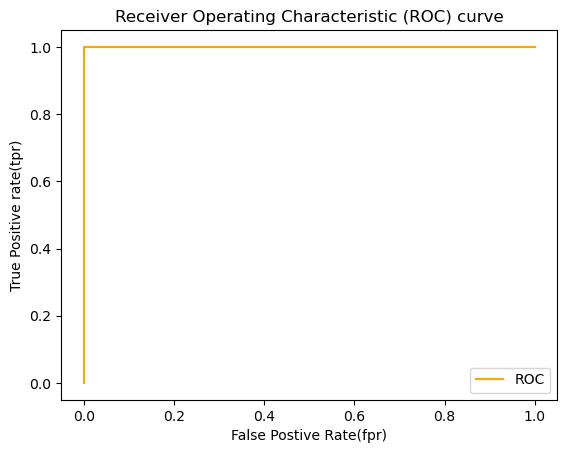

In [211]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt 
def plot_roc_curve(fpr,tpr):
    '''Plots a ROC curve given the false positive rate(fpr) and true positive rate(tpr) of a model'''
    plt.plot(fpr,tpr,color='orange',label='ROC')
    #plot line with no predictive power (baseline)
    #plt.plot([0,1],[0,1],color='darkblue',linestyle='--',lbel='Guessing')
    plt.xlabel('False Postive Rate(fpr)')
    plt.ylabel('True Positive rate(tpr)')
    plt.title('Receiver Operating Characteristic (ROC) curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

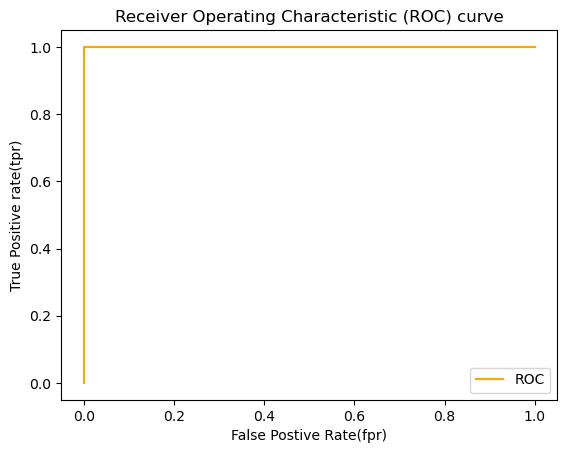

In [213]:
# Plot Perfect ROC & AUC score
fpr,tpr,thresholds = roc_curve(Y_test,Y_test)
plot_roc_curve(fpr,tpr)

In [217]:
# perfect AUC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_test)

1.0

## Confusion matrix
A confusion matrix is a quick way to compare the labels a model predict and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused


In [218]:
from sklearn.metrics import confusion_matrix
Y_preds = clf.predict(X_test)
confusion_matrix(Y_test,Y_preds)

array([[24,  5],
       [ 4, 28]])

In [219]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /Users/jayashree/Desktop/ml_course/sample_project/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.12.2             |  py312hecd8cb5_0         563 KB
    ------------------------------------------------------------
                                           Total:         563 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/osx-64::seaborn-0.12.2-py312hecd8cb5_0 



                                                                                
Preparing transaction: done
Verifying transaction: \ WARNING conda.core.path_actions:verify(1055): Unable to create environments file. Path not writable.
  environment location: /Users/jayashree/.conda/environment

<Axes: >

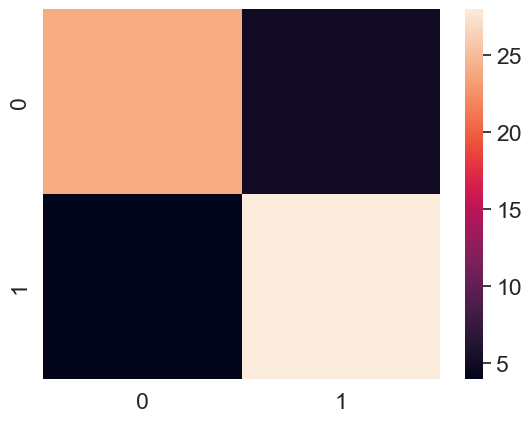

In [220]:
# make your confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

#Set the font scale
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat = confusion_matrix(Y_test, Y_preds)

#plot it using Seaborn
sns.heatmap(conf_mat)

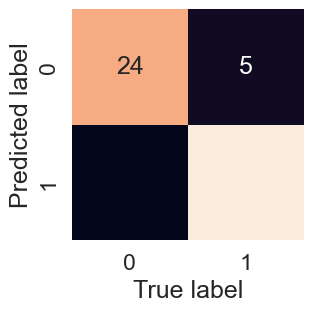

In [225]:
from matplotlib.pyplot import subplots
def plot_conf_mat(conf_mat):
    """Plots a confusion matrix using Seaborn's heamap() """
    fig,ax = subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,annot=True,#Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')

    #fix the broken annotations (this happend in matplotlib 3.1.1)
    #bottom,top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5,top-0.5);
plot_conf_mat(conf_mat)



## Classification Report

In [230]:
from sklearn.metrics import classificaton_report
print(classification_report(Y_test,Y_preds))

ImportError: cannot import name 'classificaton_report' from 'sklearn.metrics' (/Users/jayashree/Desktop/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/__init__.py)

## 4.2.2 <u>Regression model evaluation metrics<u>
1) R_squared or coefficient of determination
2) Mean Absolute Error (MAE)
3) Mean Squared Error (MSE)
## R_Squared
Compares the model predictions to the mean of the targets

In [8]:

import pandas as pd 
import numpy as np
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing['data'],columns=housing['feature_names'])
housing['MedHouseVal'] = housing['target']
housing_df['MedHouseVal'] = pd.Series(housing['target'])

from sklearn.ensemble import RandomForestRegressor

# Create X & Y
X = housing_df.drop('MedHouseVal',axis=1)
Y = housing_df['MedHouseVal']
#Import algorithm/estimator

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [10]:
model.score(X_test,Y_test)

0.8097037680865469

In [6]:
housing_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
Y_test.mean()

2.0275747674418603

In [13]:
from sklearn.metrics import r2_score
#fill an array with y_test mean
y_test_mean = np.full(len(Y_test),Y_test.mean())
y_test_mean[:10]

array([2.02757477, 2.02757477, 2.02757477, 2.02757477, 2.02757477,
       2.02757477, 2.02757477, 2.02757477, 2.02757477, 2.02757477])

In [15]:
r2_score(y_true=Y_test,
         y_pred=y_test_mean)

0.0

In [19]:
r2_score(y_true=Y_test,y_pred=Y_test)

1.0

## Mean Absolute Error(MAE)
MAE is the average of the absolute differences between predictions and actual values.
It gives you an idea of how wrong you models predictions are.

In [36]:
import pandas as pd 
import numpy as np
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing['data'],columns=housing['feature_names'])
housing['MedHouseVal'] = housing['target']
housing_df['MedHouseVal'] = pd.Series(housing['target'])

from sklearn.ensemble import RandomForestRegressor

# Create X & Y
X = housing_df.drop('MedHouseVal',axis=1)
Y = housing_df['MedHouseVal']
#Import algorithm/estimator

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,Y_train)

from sklearn.metrics import mean_absolute_error

Y_preds = model.predict(X_test)
mae = mean_absolute_error(Y_test, Y_preds)

In [37]:
mae

0.33230555993217076

df = pd.DataFrame(data={'Actual_values':Y_test,'Predicted_values':Y_preds})
df['difference'] = df['Predicted_values']-df['Actual_values']
np.absolute(df['difference']).mean()


In [48]:
df

,Actual_values,Predicted_values,difference
8007,2.19500,2.00864,-0.18636
18537,2.75000,2.66798,-0.08202
7330,1.56000,1.46865,-0.09135
2127,0.74600,1.39059,0.64459
18168,5.00001,2.20464,-2.79537
...,...,...,...
3128,0.81900,0.91744,0.09844
1367,1.78300,1.89119,0.10819
16575,1.32000,1.56273,0.24273
6433,2.78400,2.36511,-0.41889


## Mean Sqaure Error (MSE)
MSE is the mean of the square of the errors between actual and predicted values

In [51]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,Y_preds)
mse

0.2453685251971489

In [55]:
df['squared_differenc'] = np.square(df['difference'])

In [56]:
df['squared_differenc'] 

8007     0.034730
18537    0.006727
7330     0.008345
2127     0.415496
18168    7.814093
           ...   
3128     0.009690
1367     0.011705
16575    0.058918
6433     0.175469
12354    0.130530
Name: squared_differenc, Length: 4128, dtype: float64

In [57]:
np.mean(df['squared_differenc'] )

0.2453685251971489

## Model Evaluation using Scoring parameter (classification model)
* Accuracy 
* Precision
* Recall

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
heart_disease = pd.read_csv('data/heart-disease.csv')

#setup random seed
np.random.seed(42)

X=heart_disease.drop('target',axis=1)
Y=heart_disease['target']

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)
#fit the model/algorithm (training the model)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [66]:
# cross validation
np.random.seed(42)
from sklearn.model_selection import cross_val_score
cv_accuracy = cross_val_score(clf,X,Y,cv=5,scoring=None)
cv_accuracy

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [68]:
# Cross validated accuracy
print(f'The cross validated accuracy is:{np.mean(cv_accuracy)*100:.2f}%')

The cross validated accuracy is:82.48%


In [72]:
# Cross validated precision
np.random.seed(42)
cv_precision = cross_val_score(clf,X,Y,cv=5,scoring='precision')
print(f'The cross validated precision is:{np.mean(cv_precision)}')

The cross validated precision is:0.8329547346025924


In [75]:
# Cross validated Recall
cv_recall = cross_val_score(clf,X,Y,cv=5,scoring='recall')
print(f'The cross validated recall is:{np.mean(cv_recall)}')

The cross validated recall is:0.8484848484848484


## Model Evaluation using Scoring parameter (Regression model)

In [78]:
import pandas as pd 
import numpy as np
np.random.seed(42)
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing['data'],columns=housing['feature_names'])
housing['MedHouseVal'] = housing['target']
housing_df['MedHouseVal'] = pd.Series(housing['target'])

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Create X & Y
X = housing_df.drop('MedHouseVal',axis=1)
Y = housing_df['MedHouseVal']
#Import algorithm/estimator

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,Y_train)


RandomForestRegressor()

In [83]:
np.random.seed(42)
# Cross validated R2
cv_r2 = cross_val_score(model,X,Y,cv=3,scoring=None)

print(f'The cross validated R_squared is:{np.mean(cv_r2)*100:.2f}%')

The cross validated R_squared is:65.46%


In [85]:
np.random.seed(42)
#Mean Absolute error(MAE)
cv_mae = cross_val_score(model,X,Y,cv=3,scoring='neg_mean_squared_error')

print(f'The cross validated MAE is:{np.mean(cv_mae)*100:.2f}%')

The cross validated MAE is:-46.14%


In [93]:
#Mean squared error
cv_mse= cross_val_score(model,X,Y,cv=3,scoring='neg_mean_absolute_error')
print(f'The cross validated MSE is:{np.mean(cv_mse)*100:.2f}%')

The cross validated MSE is:-48.20%


## 4.3 Evaluating the model with Scikit-Learn functions
Using sklearn.metrics module
## Classification model


In [99]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
heart_disease = pd.read_csv('data/heart-disease.csv')

#setup random seed
np.random.seed(42)

X=heart_disease.drop('target',axis=1)
Y=heart_disease['target']

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)
#fit the model/algorithm (training the model)
clf.fit(X_train,Y_train)
#make predictions
Y_pred = clf.predict(X_test)
#Evaluate model using evaluation functions
print('Classifier metrics on the test set')
print(f'Accuracy:{accuracy_score(Y_test,Y_pred)*100:.2f}%')
print(f'Precision:{precision_score(Y_test,Y_pred)}')
print(f'Recall:{recall_score(Y_test,Y_pred)}')
print(f'F1:{f1_score(Y_test,Y_pred)}')

Classifier metrics on the test set
Accuracy:85.25%
Precision:0.8484848484848485
Recall:0.875
F1:0.8615384615384616


## Regresson model

In [103]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
np.random.seed(42)
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing['data'],columns=housing['feature_names'])
housing['MedHouseVal'] = housing['target']
housing_df['MedHouseVal'] = pd.Series(housing['target'])

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Create X & Y
X = housing_df.drop('MedHouseVal',axis=1)
Y = housing_df['MedHouseVal']

#split data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

#Fit model
model = RandomForestRegressor()
model.fit(X_train,Y_train)
#make predictions
Y_pred = model.predict(X_test)
#Evaluate model using evaluation functions
print('Classifier metrics on the test set')
print(f'R2 score:{r2_score(Y_test,Y_pred)*100:.2f}%')
print(f'mae:{mean_absolute_error(Y_test,Y_pred)}')
print(f'mse:{mean_squared_error(Y_test,Y_pred)}')
print(f'F1:{f1_score(Y_test,Y_pred)}')

Classifier metrics on the test set
R2 score:80.66%
mae:0.3265721842781009
mse:0.2534073069137548


ValueError: continuous is not supported

0) An end to end scikit learn workflow
1) Getting the data ready
2) Choosing the right estimator/algorithm for our problems
3) Fit the model/algorithm and use it to make predictions on our data
4) Evaluating a model
5) Improve a model
6) Save & load a trained model
7) Putting it all together

### 5: Improving a model
* First predictions = baseline predictions
* First model = baseline model

From a data perspective
* Could we collect more data? (generally, the more data, the better)
* Could we improve the data

From a model perspective
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vz parameters
* Parameters = model find these patterns in data
* Hyperparameters= settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCv

In [105]:
from sklearn.ensemble import RandomForestClassifier
clf =  RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning the hyperparameters by hand
Lets make 3 sets 
Training set, validation set, testing set
we are going to try and adjust
* max_depth
* max_feature
* min_samples_leaf
* min_samples_split
* n_estimators

In [109]:
def evaluate_preds(y_true,y_pred):
    """Performs evaluation comparision on y_true labels vs ypred labels on a classification"""
    accuracy = accuracy_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    metric_dict = {"accuracy":round(accuracy,2),
                  "precision":round(precision,2),
                  "recall":round(recall,2),
                  "f1":round(f1,2)}
    print(f"Acc:{accuracy*100:.2f}%")
    print(f"Precision:{precision: .2f}")
    print(f"Recall:{recall}")
    print(f"F1 score:{f1}")
    return metric_dict

In [125]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#split into X,Y
X= heart_disease_shuffled.drop('target',axis=1)
Y= heart_disease_shuffled['target']

#split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split +0.15 * len(heart_disease_shuffled))# 15% of data
X_train,Y_train = X[:train_split],Y[:train_split]
X_valid,Y_valid = X[train_split:valid_split],Y[train_split:valid_split]
X_test,Y_test = X[valid_split:],Y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
Y_preds = clf.predict(X_valid)
#evaluate the  classifier
clf_metrics = evaluate_preds(Y_valid,Y_preds)

Acc:82.22%
Precision: 0.81
Recall:0.88
F1 score:0.8461538461538461


In [124]:
clf2 =  RandomForestClassifier(n_estimators=100)
clf2.fit(X_train,Y_train)
Y_preds2 = clf2.predict(X_valid)

#evaluate the 2nd classifier
clf2_metrics = evaluate_preds(Y_valid,Y_preds2)

Acc:82.22%
Precision: 0.81
Recall:0.88
F1 score:0.8461538461538461


In [127]:
clf3 =  RandomForestClassifier(n_estimators=100,max_depth=10)
clf3.fit(X_train,Y_train)
Y_preds3 = clf3.predict(X_valid)
#evaluate the 3rd classifier
clf3_metrics = evaluate_preds(Y_valid,Y_preds3)

Acc:80.00%
Precision: 0.81
Recall:0.84
F1 score:0.8235294117647058


##  5.2 Hyperparameters tuning with RandomizedSearchCV 

In [133]:

from sklearn.model_selection import RandomizedSearchCV
grid = {'n_estimators':[10,100,200,500,1000,1200],
"max_depth":[None,5,10,20,30],
"max_features" : ["auto","sqrt"],
"min_samples_split":[2,4,6],
"min_samples_leaf":[1,2,4]}
np.random.seed(42)

#split into X,Y
X= heart_disease_shuffled.drop('target',axis=1)
Y= heart_disease_shuffled['target']

#split in to train,test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2)

#setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions = grid,
                            n_iter = 10,#number of models to try
                            cv = 5,
                            verbose = 2)
rs_clf.fit(X_train,Y_train)





Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/Users/jayashree/Desktop/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jayashree/Desktop/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jayashree/Desktop/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/jayashree/Desktop/ml_course/sample_project/env/lib/

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=2),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [134]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

### Hyperparameters tuning with GridSearchCV

In [137]:

from sklearn.model_selection import GridSearchCV
grid_2 = {'n_estimators':[100,200,500],
"max_depth":[None],
"max_features" : ["auto","sqrt"],
"min_samples_split":[6],
"min_samples_leaf":[1,2]}
np.random.seed(42)

#split into X,Y
X= heart_disease_shuffled.drop('target',axis=1)
Y= heart_disease_shuffled['target']

#split in to train,test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2)

#setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf,
                            param_grid = grid_2,
                            cv = 5,
                            verbose = 2)
gs_clf.fit(X_train,Y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

/Users/jayashree/Desktop/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jayashree/Desktop/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jayashree/Desktop/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/jayashree/Desktop/ml_course/sample_project/env/lib/

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=2),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [138]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

## Lets compare different model metrics

In [ ]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics, "clf-2":clf_2_metrics,""})